# Reading Datasets

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

company = pd.read_csv("E:\\Hackathon\\company.csv",)
company.head()


,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0


In [3]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  140 non-null    object 
 1   Age      130 non-null    float64
 2   Salary   124 non-null    float64
 3   Place    134 non-null    object 
 4   Country  148 non-null    object 
 5   Gender   148 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 7.1+ KB


In [4]:
company.isna().sum()

Company     8
Age        18
Salary     24
Place      14
Country     0
Gender      0
dtype: int64

# Data Cleaning

    Encoding

In [5]:
#Verify the uniqueness for company attribute
company['Company'].unique()

array(['TCS', 'Infosys', 'CTS', nan, 'Tata Consultancy Services',
       'Congnizant', 'Infosys Pvt Lmt'], dtype=object)

In [6]:
# Encoding to the standard Names
company['Company']=company.replace(to_replace=['Tata Consultancy Services','Infosys Pvt Lmt','Congnizant'],value=['TCS','Infosys','CTS'])

In [8]:
company['Company'].unique()

array(['TCS', 'Infosys', 'CTS', nan], dtype=object)

In [9]:
#Verify the uniqueness for Place attribute

company['Place'].unique()

array(['Chennai', 'Mumbai', 'Calcutta', 'Delhi', 'Podicherry', 'Cochin',
       nan, 'Noida', 'Hyderabad', 'Bhopal', 'Nagpur', 'Pune'],
      dtype=object)

In [10]:
#Verify the uniqueness for Country attribute

company['Country'].unique()

array(['India'], dtype=object)

    Decoding Gender column and create a new for better readability

In [13]:
company['Gender(M/F)']=company[['Gender']].replace(to_replace=[0,1],value=['F','M'])

In [14]:
company['Gender(M/F)'].unique()

array(['F', 'M'], dtype=object)

In [20]:
print('''It says not all 3 comparnies are running in the same locations across India. So,
imputing the places using mode should done within company for employee missing Place info''')

age[['Company','Place']].sort_values(['Company','Place']).drop_duplicates()


It says not all 3 comparnies are running in the same locations across India. So,
imputing the places using mode should done within company for employee missing Place info


,Company,Place
0,CTS,Calcutta
2,CTS,Chennai
3,CTS,Cochin
4,CTS,Delhi
6,CTS,Hyderabad
8,CTS,Mumbai
10,CTS,Noida
11,CTS,Podicherry
13,CTS,Pune
15,Infosys,Bhopal


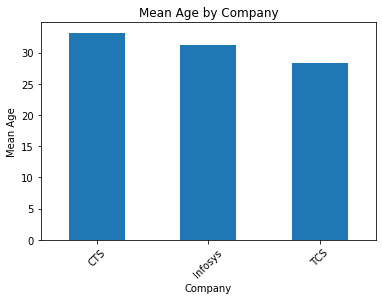

In [45]:
age.groupby('Company').mean().plot(kind="bar",legend=False,rot=45)
plt.ylabel("Mean Age")
plt.title("Mean Age by Company")
plt.show()

Note : Age mean by company are almost closer to each other above.

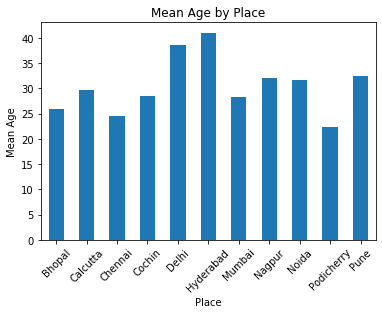

In [46]:
age.groupby('Place').mean().plot(kind="bar",legend=False,rot=45)
plt.ylabel("Mean Age")
plt.title("Mean Age by Place")
plt.show()

Note: Age mean by Place is drastically differ from each other while I compare the mean by company

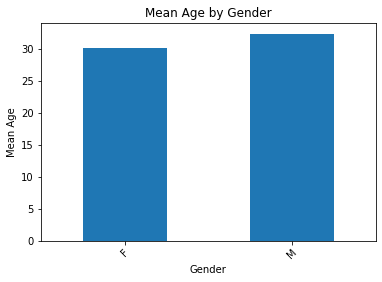

In [53]:
age.groupby('Gender(M/F)').mean().plot(kind="bar",legend=False,rot=45)
plt.ylabel("Mean Age")
plt.xlabel("Gender")
plt.title("Mean Age by Gender")
plt.show()

Note :  Mean Age by Gender is coming closer to each other

# Imputing

Categorical Imputation:

    While imputing the data, impute within each of the respective groups else it will imputed with unrelevant value. Example, When we impute place column for an employee from TCS, I considered places where TCS is operating only.
    
    Impute categorical data in top to bottom hierachy if there is any relationship present between 2 categorical columns like "Company to Place"

Numerical Imputation:

    In the above steps, mean age by places are different in each places. so, imputing the missing age by its mean of places makes more accurate


In [68]:
company.isna().sum()  #Where Categorical Col = [Company, Place] and Numerical Col = [Salary, Age]

Company         8
Age            18
Salary         24
Place          14
Country         0
Gender          0
Gender(M/F)     0
dtype: int64

# Imputation of Categorical data by its mode

Imputing Company

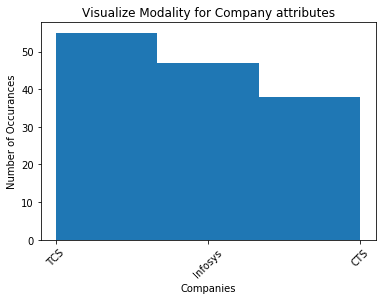

In [56]:
company['Company'].hist(grid=False,bins=3,xrot=45)
plt.title('Visualize Modality for Company attributes')
plt.ylabel("Number of Occurances")
plt.xlabel("Companies")
plt.show()

In [75]:
co_mod = list(company['Company'].mode())
company['Company'].fillna(co_mod[0],inplace=True)

In [128]:
company['Company'].isna().sum()

0

Imputing Place

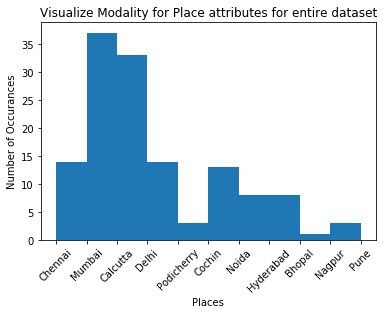

In [115]:
company['Place'].hist(grid=False,xrot=45)
plt.title('Visualize Modality for Place attributes for entire dataset')
plt.ylabel("Number of Occurances")
plt.xlabel("Places")
plt.show()

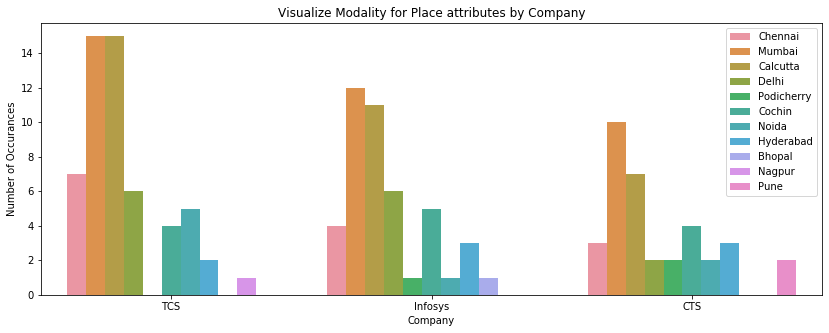

In [113]:
sns.countplot(x = 'Company', hue = 'Place', data = company)
fig = plt.gcf()
fig.set_size_inches( 14, 5)
plt.legend(loc='upper right')
plt.ylabel("Number of Occurances")
plt.title('Visualize Modality for Place attributes by Company')
plt.show()

In [192]:
for com in company['Company'].unique():
    pla_mod=list(company.query('Company==@com')['Place'].mode())[0]
    company[company['Company']==com][['Place']].fillna(pla_mod,inplace=True)


# Imputation of Numeric data by its mean



Imputing Age & Salary

In [193]:
company.groupby('Place').mean()

,Age,Salary,Gender
Place,,,
Bhopal,26.000000,7000.000000,0.000000
Calcutta,28.344828,5033.428571,0.212121
Chennai,28.600000,6115.090909,0.214286
Cochin,29.818182,5053.000000,0.153846
Delhi,35.923077,4768.833333,0.214286
Hyderabad,40.571429,4382.833333,0.125000
Mumbai,29.181818,4867.931034,0.162162
Nagpur,32.000000,8000.000000,0.000000
Noida,30.875000,4387.000000,0.125000


In [194]:
company['Age'].fillna(company['Age'].mean(),inplace=True)

In [195]:
company.isnull().sum()

Company         0
Age             0
Salary         24
Place          14
Country         0
Gender          0
Gender(M/F)     0
dtype: int64

Imputing Salary

In [196]:
company['Salary'].mean()

5312.467741935484

In [197]:
company['Salary'].fillna(company['Salary'].mean(),inplace=True)

In [198]:
company['Salary'].mean()

5312.467741935484

In [199]:
company.isnull().sum()

Company         0
Age             0
Salary          0
Place          14
Country         0
Gender          0
Gender(M/F)     0
dtype: int64

# Dimensionality Reduction

In [200]:
company_mean=company.groupby(['Company']).agg('mean')

In [201]:
company_mean

,Age,Salary,Gender
Company,,,
CTS,31.631579,4794.109083,0.210526
Infosys,31.784615,5329.741935,0.148936
TCS,28.822955,5612.241423,0.285714


In [202]:
company_min_max=company.groupby(['Company']).agg(['min','max']).reset_index()


In [203]:
company_min_max

Company  Age        Salary         Country        Gender     Gender(M/F)  \
            min   max     min     max     min    max    min max         min   
0      CTS  0.0  46.0  1089.0  9876.0   India  India      0   1           F   
1  Infosys  0.0  54.0  3000.0  8943.0   India  India      0   1           F   
2      TCS  0.0  38.0  2300.0  9024.0   India  India      0   1           F   

       
  max  
0   M  
1   M  
2   M

# Visualisation

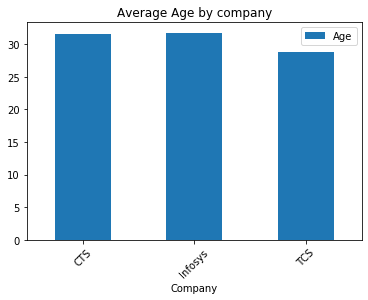

In [204]:
company_mean.plot(kind="bar",y='Age',rot=45,title="Average Age by company")
plt.show()

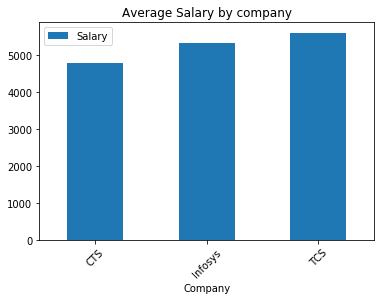

In [205]:
company_mean.plot(kind="bar",y='Salary',rot=45,title="Average Salary by company")
plt.show()

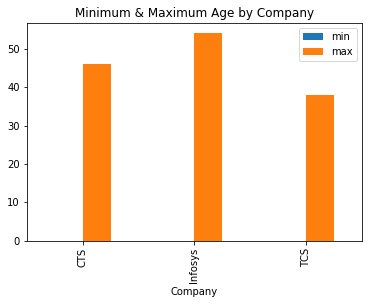

In [206]:
company_min_max.plot(kind='bar',x='Company',y='Age',title="Minimum & Maximum Age by Company")

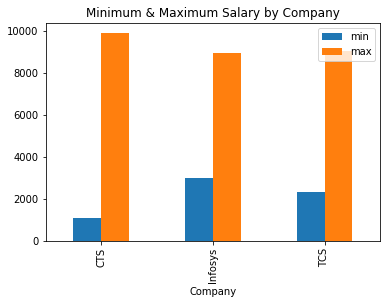

In [207]:
company_min_max.plot(kind='bar',x='Company',y='Salary',title="Minimum & Maximum Salary by Company")